In [25]:
import pandas as pd
from datetime import datetime
import numpy as np
from sklearn.model_selection  import train_test_split
from sklearn import metrics
import sys
pd.set_option("display.max_columns",90) #設定pandas最多顯示出50個欄位資訊
pd.set_option('display.max_rows', None)
df = pd.read_csv("107年新竹站_20190315.csv", encoding = 'big5')
#df = pd.read_csv("大里_2020.csv", encoding = 'big5')
df =df.replace(['NR','NaN','455#'],0)
df['日期'] = pd.to_datetime(df['日期'],format='%Y/%m/%d')
#df['00'] = df['00'].astype(float)
#df.dtypes
#測站: location 測項:items
#df

In [26]:
df_item = pd.get_dummies(df['測項'])                                                #顯示幾種特徵
df_show = pd.merge(df,df_item ,left_index=True,right_index=True)
#df_show.dtypes

In [27]:
df_show['0']=df_show['0'].str.split("x").str.get(0).str.title()
df_show['0']=df_show['0'].str.split("*").str.get(0).str.title()
df_show['0']=df_show['0'].str.split("A").str.get(0).str.title()
df_show['0']=df_show['0'].str.split("#").str.get(0).str.title()
df_show['1']=df_show['1'].str.split("x").str.get(0).str.title()
df_show['1']=df_show['1'].str.split("*").str.get(0).str.title()
df_show['1']=df_show['1'].str.split("A").str.get(0).str.title()
df_show['2']=df_show['2'].str.split("#").str.get(0).str.title()
df_show['2']=df_show['2'].str.split("x").str.get(0).str.title()
df_show['2']=df_show['2'].str.split("*").str.get(0).str.title()
df_show['2']=df_show['2'].str.split("A").str.get(0).str.title()
df_show['2']=df_show['2'].str.split("X").str.get(0).str.title()
df_show['1']=df_show['1'].str.split("#").str.get(0).str.title()
df_show['3']=df_show['3'].str.split("x").str.get(0).str.title()
df_show['3']=df_show['3'].str.split("*").str.get(0).str.title()
df_show['3']=df_show['3'].str.split("A").str.get(0).str.title()
df_show['3']=df_show['3'].str.split("X").str.get(0).str.title()
df_show['3']=df_show['3'].str.split("#").str.get(0).str.title()
df_show['0'] = df_show['0'].astype(float)
df_show['1'] = df_show['1'].astype(float)
df_show['2'] = df_show['2'].astype(float)
df_show['3'] = df_show['3'].astype(float)


In [28]:
df_show['4']=df_show['4'].str.split("#").str.get(0).str.title()
df_show['4']=df_show['4'].str.split("x").str.get(0).str.title()
df_show['4']=df_show['4'].str.split("*").str.get(0).str.title()
df_show['4']=df_show['4'].str.split("A").str.get(0).str.title()
df_show['4']=df_show['4'].str.split("X").str.get(0).str.title()
df_show['5']=df_show['5'].str.split("#").str.get(0).str.title()
df_show['5']=df_show['5'].str.split("x").str.get(0).str.title()
df_show['5']=df_show['5'].str.split("*").str.get(0).str.title()
df_show['5']=df_show['5'].str.split("A").str.get(0).str.title()
df_show['5']=df_show['5'].str.split("X").str.get(0).str.title()
df_show['6']=df_show['6'].str.split("#").str.get(0).str.title()
df_show['6']=df_show['6'].str.split("x").str.get(0).str.title()
df_show['6']=df_show['6'].str.split("*").str.get(0).str.title()
df_show['6']=df_show['6'].str.split("A").str.get(0).str.title()
df_show['6']=df_show['6'].str.split("X").str.get(0).str.title()
#print(train['00'])
df_show['4'] = df_show['4'].astype(float)
df_show['5'] = df_show['5'].astype(float)
df_show['6'] = df_show['6'].astype(float)



In [29]:
df_show = df_show.groupby("測項")
PM25 = df_show.get_group("PM2.5").reset_index(drop=True)
PM25

,id,日期,測站,測項,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,RAINFALL,RH,SO2,THC,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR
0,10,2018-10-01,新竹,PM2.5,19.0,17.0,15.0,17.0,18.0,13.0,14.0,19,20,19,21,22,18,19,24,31,33,34,38,42,40,38,36,29,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,28,2018-10-02,新竹,PM2.5,28.0,31.0,27.0,21.0,16.0,19.0,12.0,11,16,13,14,0,18,17,19,20,16,17,17,15,14,13,15,13,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,46,2018-10-03,新竹,PM2.5,9.0,8.0,10.0,11.0,11.0,13.0,17.0,13,10,10,10,13,16,13,11,11,14,14,11,15,21,17,13,17,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,64,2018-10-04,新竹,PM2.5,19.0,17.0,19.0,17.0,14.0,17.0,18.0,17,16,14,13,14,14,14,17,19,18,17,18,17,15,16,13,12,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,82,2018-10-05,新竹,PM2.5,13.0,15.0,16.0,17.0,19.0,19.0,19.0,19,21,22,23,23,21,24,24,22,19,21,24,23,28,31,27,27,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,100,2018-10-06,新竹,PM2.5,27.0,27.0,29.0,29.0,24.0,20.0,23.0,26,24,19,19,22,21,19,20,22,22,26,28,26,25,22,21,23,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6,118,2018-10-07,新竹,PM2.5,22.0,18.0,18.0,18.0,17.0,20.0,21.0,24,24,24,24,24,24,25,25,24,25,24,21,23,24,22,17,16,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7,136,2018-10-08,新竹,PM2.5,16.0,18.0,19.0,18.0,17.0,17.0,21.0,19,15,14,14,16,20,24,25,26,21,22,23,21,20,20,22,21,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
8,154,2018-10-09,新竹,PM2.5,21.0,19.0,18.0,16.0,16.0,20.0,22.0,24,24,24,25,24,23,20,20,19,18,22,23,23,23,22,22,20,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9,172,2018-10-10,新竹,PM2.5,20.0,21.0,21.0,17.0,14.0,10.0,10.0,14,18,20,16,20,25,24,23,24,28,32,32,30,35,37,33,35,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [30]:
PM25['7'] = PM25['7'].astype(float)
PM25['8'] = PM25['8'].astype(float)
PM25['9']=PM25['9'].str.split("A").str.get(0).str.title()
PM25['9'] = PM25['9'].astype(float)
PM25['10']=PM25['10'].str.split("#").str.get(0).str.title()
PM25['10'] = PM25['10'].astype(float)
PM25['11']=PM25['11'].str.split("#").str.get(0).str.title()
PM25['11']=PM25['11'].str.split("A").str.get(0).str.title()
PM25['12']=PM25['12'].str.split("#").str.get(0).str.title()
PM25['13']=PM25['13'].str.split("#").str.get(0).str.title()
PM25['14']=PM25['14'].str.split("#").str.get(0).str.title()

In [31]:
                                                                                           #PM2.5資料數值化
PM25['11'] =PM25['11'].astype(float)                                                        
PM25['12'] = PM25['12'].astype(float)
PM25['13'] = PM25['13'].astype(float)
PM25['14'] = PM25['14'].astype(float)
PM25['15'] = PM25['15'].astype(float)
PM25['16'] = PM25['16'].astype(float)
PM25['17'] = PM25['17'].astype(float)
PM25['18'] = PM25['18'].astype(float)
PM25['19'] = PM25['19'].astype(float)
PM25['20'] = PM25['20'].astype(float)
PM25['21'] = PM25['21'].astype(float)
PM25['22'] = PM25['22'].astype(float)
PM25['23'] = PM25['23'].astype(float)

In [32]:
PM25_inside = PM25[['0', '1','2', '3','4', '5','6', '7','8', '9','10', '11','12', '13'     #取出PM2.5資料 共2208筆
                    ,'14', '15','16', '17','18', '19','20', '21','22', '23']]
#PM25

In [33]:
X = PM25[['0','1','2','3','4','5']]
y = PM25[['6']]
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2) # 30% for testing, 70% for training


In [34]:
PM25 = PM25.fillna(0)
#X = PM25[['1','2','3','4','5','6']]
#y = PM25[['7']]
#X = PM25[['8','3','4','5','6','7']]
#y = PM25[['9']]
#X = PM25[['13','12','11','10','9','14']]
#y = PM25[['15']]
#X =X.fillna(0)
#y = y.fillna(0)

In [35]:
X_train = X[:64]                                                  # 30% for testing, 70% for training
X_test  = X[64:]
y_train =y[:64]
y_test  =y[64:]
#X_train

In [36]:
from sklearn.preprocessing import StandardScaler                                                          #標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [37]:
from sklearn import datasets, linear_model

regr = linear_model.LinearRegression()

# 訓練模型
regr.fit(X_train_std, y_train)
print("MSE: %.2f" % np.mean((regr.predict(X_test_std) - y_test) ** 2))
print("Test R Square_test:",regr.score(X_test_std, y_test))
print("Train R Square_train:",regr.score(X_train_std, y_train))

MSE: 3.28
Test R Square_test: 0.9486388693561782
Train R Square_train: 0.9187174903999045


In [38]:
predict = pd.DataFrame(regr.predict(X_test_std))
predict.columns = ['predict']
real = pd.DataFrame(y_test.values)
real.columns = ['real']
df1 = pd.concat( [real, predict], axis=1 )
df2 = pd.concat( [X_train, y_train], axis=1 )

In [39]:
X_rnn = np.array(X_train).reshape(len(X_train), 6,1)                              #使用簡單RNN
y_rnn = np.array(y_train).reshape(len(y_train),1)
print(X_rnn.shape)
print(y_rnn.shape)


(64, 6, 1)
(64, 1)


In [40]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.recurrent import SimpleRNN

In [41]:
model = Sequential()
model.add(SimpleRNN(units=16, input_shape=(6,1)))
model.add(Dense(256))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 16)                288       
_________________________________________________________________
dense_2 (Dense)              (None, 256)               4352      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 4,897
Trainable params: 4,897
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.fit(X_rnn, y_rnn, epochs=1000, batch_size=5, verbose=2)

Epoch 1/1000
13/13 - 1s - loss: 364.1266
Epoch 2/1000
13/13 - 0s - loss: 226.6855
Epoch 3/1000
13/13 - 0s - loss: 130.2191
Epoch 4/1000
13/13 - 0s - loss: 85.1403
Epoch 5/1000
13/13 - 0s - loss: 80.5741
Epoch 6/1000
13/13 - 0s - loss: 76.7100
Epoch 7/1000
13/13 - 0s - loss: 68.4191
Epoch 8/1000
13/13 - 0s - loss: 60.5753
Epoch 9/1000
13/13 - 0s - loss: 51.4451
Epoch 10/1000
13/13 - 0s - loss: 42.7043
Epoch 11/1000
13/13 - 0s - loss: 31.8892
Epoch 12/1000
13/13 - 0s - loss: 25.0738
Epoch 13/1000
13/13 - 0s - loss: 20.4184
Epoch 14/1000
13/13 - 0s - loss: 17.6363
Epoch 15/1000
13/13 - 0s - loss: 15.0699
Epoch 16/1000
13/13 - 0s - loss: 13.3722
Epoch 17/1000
13/13 - 0s - loss: 12.1889
Epoch 18/1000
13/13 - 0s - loss: 11.8919
Epoch 19/1000
13/13 - 0s - loss: 10.9825
Epoch 20/1000
13/13 - 0s - loss: 11.0916
Epoch 21/1000
13/13 - 0s - loss: 10.9737
Epoch 22/1000
13/13 - 0s - loss: 10.6897
Epoch 23/1000
13/13 - 0s - loss: 11.0826
Epoch 24/1000
13/13 - 0s - loss: 10.2800
Epoch 25/1000
13/13 - 

Epoch 203/1000
13/13 - 0s - loss: 4.5813
Epoch 204/1000
13/13 - 0s - loss: 4.1916
Epoch 205/1000
13/13 - 0s - loss: 4.1555
Epoch 206/1000
13/13 - 0s - loss: 4.3149
Epoch 207/1000
13/13 - 0s - loss: 4.2037
Epoch 208/1000
13/13 - 0s - loss: 4.3640
Epoch 209/1000
13/13 - 0s - loss: 4.3251
Epoch 210/1000
13/13 - 0s - loss: 4.5227
Epoch 211/1000
13/13 - 0s - loss: 4.4082
Epoch 212/1000
13/13 - 0s - loss: 4.7509
Epoch 213/1000
13/13 - 0s - loss: 5.1873
Epoch 214/1000
13/13 - 0s - loss: 4.7501
Epoch 215/1000
13/13 - 0s - loss: 4.3747
Epoch 216/1000
13/13 - 0s - loss: 4.7979
Epoch 217/1000
13/13 - 0s - loss: 4.4298
Epoch 218/1000
13/13 - 0s - loss: 4.8298
Epoch 219/1000
13/13 - 0s - loss: 4.6337
Epoch 220/1000
13/13 - 0s - loss: 4.4923
Epoch 221/1000
13/13 - 0s - loss: 4.1013
Epoch 222/1000
13/13 - 0s - loss: 3.9832
Epoch 223/1000
13/13 - 0s - loss: 4.3004
Epoch 224/1000
13/13 - 0s - loss: 4.3586
Epoch 225/1000
13/13 - 0s - loss: 4.1707
Epoch 226/1000
13/13 - 0s - loss: 4.1976
Epoch 227/1000
1

Epoch 403/1000
13/13 - 0s - loss: 3.1009
Epoch 404/1000
13/13 - 0s - loss: 3.2695
Epoch 405/1000
13/13 - 0s - loss: 2.7263
Epoch 406/1000
13/13 - 0s - loss: 2.9909
Epoch 407/1000
13/13 - 0s - loss: 2.8102
Epoch 408/1000
13/13 - 0s - loss: 2.7707
Epoch 409/1000
13/13 - 0s - loss: 2.7728
Epoch 410/1000
13/13 - 0s - loss: 2.5887
Epoch 411/1000
13/13 - 0s - loss: 2.9949
Epoch 412/1000
13/13 - 0s - loss: 3.0869
Epoch 413/1000
13/13 - 0s - loss: 2.5546
Epoch 414/1000
13/13 - 0s - loss: 3.2393
Epoch 415/1000
13/13 - 0s - loss: 2.8516
Epoch 416/1000
13/13 - 0s - loss: 2.7606
Epoch 417/1000
13/13 - 0s - loss: 2.9135
Epoch 418/1000
13/13 - 0s - loss: 2.6473
Epoch 419/1000
13/13 - 0s - loss: 2.9462
Epoch 420/1000
13/13 - 0s - loss: 2.8081
Epoch 421/1000
13/13 - 0s - loss: 2.6593
Epoch 422/1000
13/13 - 0s - loss: 2.6346
Epoch 423/1000
13/13 - 0s - loss: 2.8968
Epoch 424/1000
13/13 - 0s - loss: 2.9085
Epoch 425/1000
13/13 - 0s - loss: 2.8089
Epoch 426/1000
13/13 - 0s - loss: 2.6467
Epoch 427/1000
1

Epoch 603/1000
13/13 - 0s - loss: 2.6676
Epoch 604/1000
13/13 - 0s - loss: 2.4679
Epoch 605/1000
13/13 - 0s - loss: 2.3163
Epoch 606/1000
13/13 - 0s - loss: 2.1477
Epoch 607/1000
13/13 - 0s - loss: 1.9964
Epoch 608/1000
13/13 - 0s - loss: 2.0789
Epoch 609/1000
13/13 - 0s - loss: 1.9366
Epoch 610/1000
13/13 - 0s - loss: 1.8944
Epoch 611/1000
13/13 - 0s - loss: 2.0648
Epoch 612/1000
13/13 - 0s - loss: 2.5469
Epoch 613/1000
13/13 - 0s - loss: 2.0478
Epoch 614/1000
13/13 - 0s - loss: 2.0872
Epoch 615/1000
13/13 - 0s - loss: 2.4143
Epoch 616/1000
13/13 - 0s - loss: 2.1672
Epoch 617/1000
13/13 - 0s - loss: 2.0052
Epoch 618/1000
13/13 - 0s - loss: 1.9106
Epoch 619/1000
13/13 - 0s - loss: 1.9970
Epoch 620/1000
13/13 - 0s - loss: 2.0084
Epoch 621/1000
13/13 - 0s - loss: 1.9128
Epoch 622/1000
13/13 - 0s - loss: 1.8483
Epoch 623/1000
13/13 - 0s - loss: 2.3347
Epoch 624/1000
13/13 - 0s - loss: 1.9600
Epoch 625/1000
13/13 - 0s - loss: 1.8620
Epoch 626/1000
13/13 - 0s - loss: 2.0430
Epoch 627/1000
1

Epoch 803/1000
13/13 - 0s - loss: 2.1514
Epoch 804/1000
13/13 - 0s - loss: 1.8869
Epoch 805/1000
13/13 - 0s - loss: 1.7880
Epoch 806/1000
13/13 - 0s - loss: 1.7811
Epoch 807/1000
13/13 - 0s - loss: 1.5964
Epoch 808/1000
13/13 - 0s - loss: 2.3202
Epoch 809/1000
13/13 - 0s - loss: 2.0623
Epoch 810/1000
13/13 - 0s - loss: 2.2211
Epoch 811/1000
13/13 - 0s - loss: 1.7791
Epoch 812/1000
13/13 - 0s - loss: 1.7494
Epoch 813/1000
13/13 - 0s - loss: 2.1949
Epoch 814/1000
13/13 - 0s - loss: 2.3796
Epoch 815/1000
13/13 - 0s - loss: 2.1208
Epoch 816/1000
13/13 - 0s - loss: 2.2507
Epoch 817/1000
13/13 - 0s - loss: 1.9757
Epoch 818/1000
13/13 - 0s - loss: 2.7154
Epoch 819/1000
13/13 - 0s - loss: 1.6632
Epoch 820/1000
13/13 - 0s - loss: 1.8064
Epoch 821/1000
13/13 - 0s - loss: 1.7822
Epoch 822/1000
13/13 - 0s - loss: 1.7278
Epoch 823/1000
13/13 - 0s - loss: 2.2257
Epoch 824/1000
13/13 - 0s - loss: 2.1487
Epoch 825/1000
13/13 - 0s - loss: 1.6903
Epoch 826/1000
13/13 - 0s - loss: 1.7223
Epoch 827/1000
1

In [43]:
y_pred_rnn = model.predict(X_rnn).reshape(-1)
y_pred_rnn.shape

(64,)

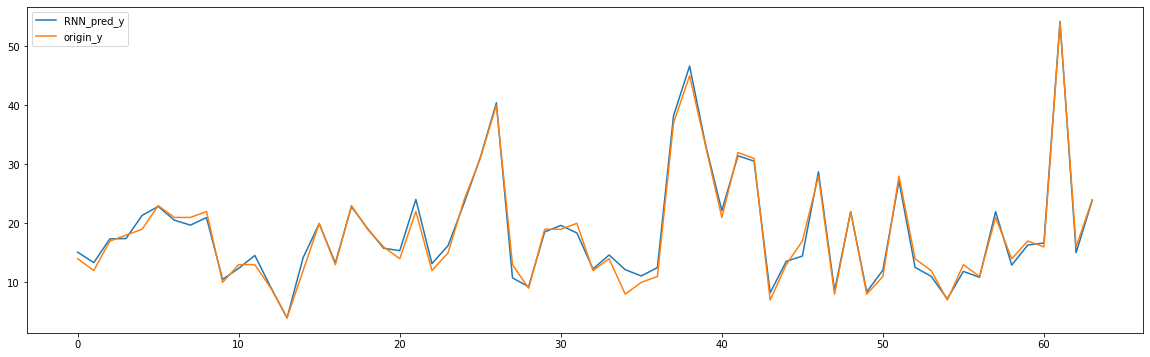

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.plot(y_train.index, y_pred_rnn, label='RNN_pred_y')
plt.plot(y_train.index, y_train, label='origin_y')
plt.legend()

In [45]:
X_rnn_test = np.array(X_test).reshape(len(X_test), 6,1) 
y_pred_rnn_test = model.predict(X_rnn_test).reshape(-1)

print('MSE = ', metrics.mean_squared_error(y_test.values, y_pred_rnn_test))

MSE =  25.520237547487056


In [46]:
y_pred_rnn 
predict = pd.DataFrame(y_pred_rnn_test)
predict.columns = ['predict']
real = pd.DataFrame(y_test.values)
real.columns = ['real']
df1 = pd.concat( [real, predict], axis=1 )

<AxesSubplot:title={'center':'折線圖'}>

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 25240 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 32218 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22294 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 25240 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 32218 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 22294 missing from curre

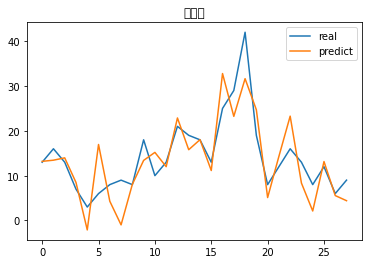

In [47]:
df1.plot(kind='line',title='折線圖',figsize=(6,4))